In [130]:
import pandas as pd

In [131]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Text(0,0.5,'Ubicación')

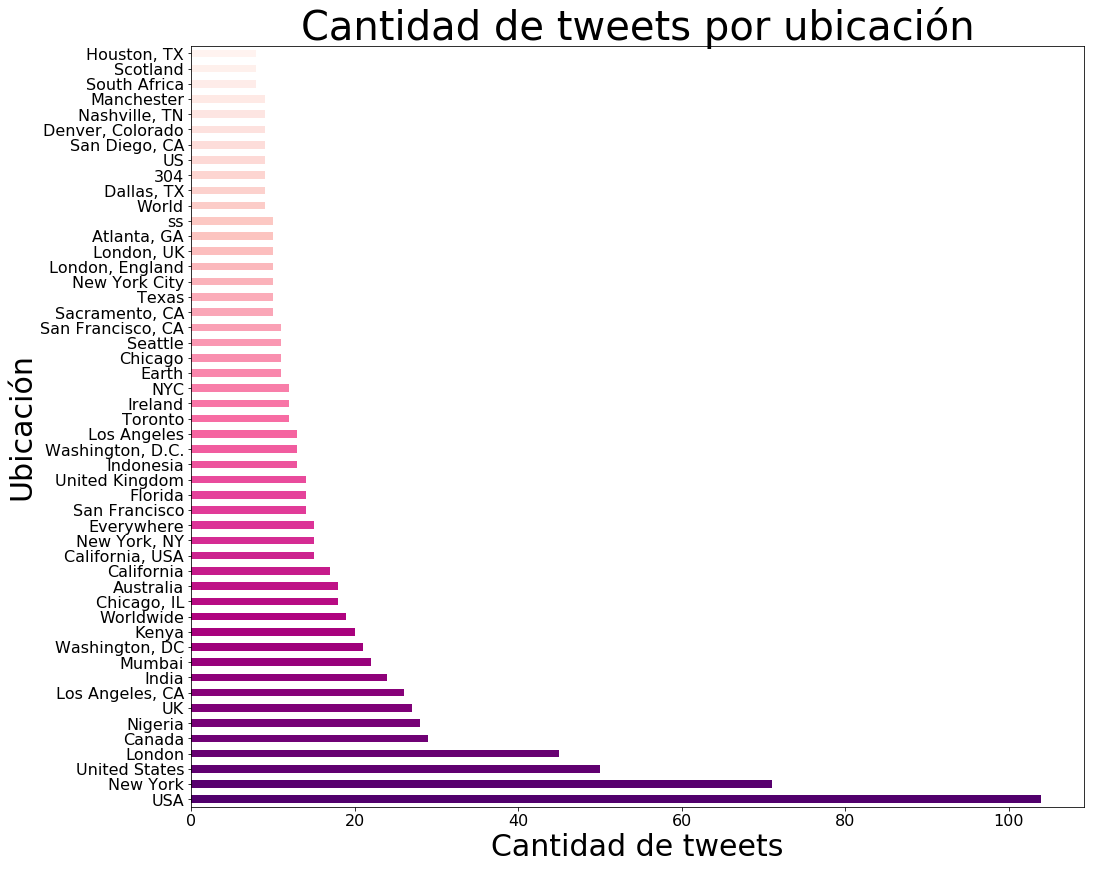

In [210]:
cmap = sns.color_palette("RdPu_r", n_colors=50)
train.location.value_counts().head(50).plot(kind='barh',color=cmap, figsize=[16,14], fontsize=16)
#plot.set_yticklabels(dataMapSorted['state'])
#plot.set_title('Tweets por estado (USA)',fontsize = 20)
plt.title('Cantidad de tweets por ubicación',fontsize = 40)
#plot.set_xlabel('Cantidad de tweets', fontsize=20)
plt.xlabel('Cantidad de tweets', fontsize=30)
plt.ylabel('Ubicación', fontsize=30)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
usaStatesAndCitiesList = ['United States', 'USA', 'NYC']
import json
with open('usaCitiesStates.json') as json_file:
    data = json.load(json_file)
    for state in data:
        usaStatesAndCitiesList.append(state)
        for city in data.get(state):
            usaStatesAndCitiesList.append(city)
usaStatesAndCitiesList

['United States',
 'USA',
 'NYC',
 'New York',
 'New York',
 'Buffalo',
 'Rochester',
 'Yonkers',
 'Syracuse',
 'Albany',
 'New Rochelle',
 'Mount Vernon',
 'Schenectady',
 'Utica',
 'White Plains',
 'Hempstead',
 'Troy',
 'Niagara Falls',
 'Binghamton',
 'Freeport',
 'Valley Stream',
 'California',
 'Los Angeles',
 'San Diego',
 'San Jose',
 'San Francisco',
 'Fresno',
 'Sacramento',
 'Long Beach',
 'Oakland',
 'Bakersfield',
 'Anaheim',
 'Santa Ana',
 'Riverside',
 'Stockton',
 'Chula Vista',
 'Irvine',
 'Fremont',
 'San Bernardino',
 'Modesto',
 'Fontana',
 'Oxnard',
 'Moreno Valley',
 'Huntington Beach',
 'Glendale',
 'Santa Clarita',
 'Garden Grove',
 'Oceanside',
 'Rancho Cucamonga',
 'Santa Rosa',
 'Ontario',
 'Lancaster',
 'Elk Grove',
 'Corona',
 'Palmdale',
 'Salinas',
 'Pomona',
 'Hayward',
 'Escondido',
 'Torrance',
 'Sunnyvale',
 'Orange',
 'Fullerton',
 'Pasadena',
 'Thousand Oaks',
 'Visalia',
 'Simi Valley',
 'Concord',
 'Roseville',
 'Victorville',
 'Santa Clara',
 'Va

In [6]:
abreviaturasDeLosEstadosUSA = ['US', 'AL', 'AK', 'AZ',  'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [7]:
paises = []
codigosPaises = []
with open('paises.json') as json_file:
    data = json.load(json_file)
    for name in data:
        paises.append(name)
        codigosPaises.append(data.get(name).get('code'))
#print(paises)
#print(codigosPaises)

In [8]:
# import re
# train.dropna(subset=['location']).head()
# regex = re.compile('\\b'+"asd"+'\\b', re.IGNORECASE)
# print(re.search(regex, " aSd "))

In [9]:
import re
realLocations = []
countries = []
locations = train[['location']].fillna("undefinedPlace")
#train.dropna(subset=['location'])
print(len(locations)) #location !NaN
locations.head()

7613


,location
0,undefinedPlace
1,undefinedPlace
2,undefinedPlace
3,undefinedPlace
4,undefinedPlace


In [10]:
import re
realLocations = []
countries = []
isLocationUSA = []
locations = train[['location']].fillna("undefinedPlace")
#train.dropna(subset=['location'])
print(len(locations)) #location
i = 0
for location in locations.location.tolist():
    
    #print(i)
    i += 1
    hasLocation = False
    isUsaLocation = False
    for place in usaStatesAndCitiesList:
        regex = re.compile('\\b'+place+'\\b', re.IGNORECASE)
        if re.search(regex, location) != None:
            hasLocation = True
            country = 'USA'
            isUsaLocation = True
            break
    if (hasLocation == False):
        for place in abreviaturasDeLosEstadosUSA:
            regex = re.compile('\\b'+place+'\\b')
            if re.search(regex, location) != None:
                hasLocation = True
                country = 'USA'
                isUsaLocation = True
                break
    if (hasLocation == False):
        for place in codigosPaises:
            regex = re.compile('\\b'+place+'\\b', re.IGNORECASE)
            if re.search(regex, location) != None:
                hasLocation = True
                country = place
                break
    if (hasLocation == False):
        for place in paises:
            regex = re.compile('\\b'+place+'\\b', re.IGNORECASE)
            if re.search(regex, location) != None:
                hasLocation = True
                country = place
                break
    if (hasLocation):
        realLocations.append(place)
        countries.append(country)
        #print("location: " + location)
        #print("country: " + country)
#         print(place)
        #print("isUsa: " + str(isUsaLocation))
    else:
        realLocations.append("undefinedPlace")
        countries.append("undefinedPlace")
    isLocationUSA.append(isUsaLocation)


7613


In [11]:
locations['realLocation'] = realLocations
locations['country'] = countries
locations['isUsa'] = isLocationUSA
locations.head()
len(isLocationUSA)

7613

In [82]:
pd.Series(isLocationUSA).value_counts()

False    5347
True     2266
dtype: int64

In [12]:
#locations[locations.country.isnull()].location.tolist()

In [13]:
# import re
# #locations = train.dropna(subset=['location'])
# locationUSA = []
# isLocationUSA = []
# for location in locations.location.tolist():
#     isUsaLocationBoolean = False
#     for place in usaStatesAndCitiesList:
#         regex = re.compile('\\b'+place+'\\b', re.IGNORECASE)
#         if re.search(regex, location) != None:
#             isUsaLocationBoolean = True
#             break
#     if (isUsaLocationBoolean == False):
#         for place in abreviaturasDeLosEstadosUSA:
#             regex = re.compile('\\b'+place+'\\b')
#             if re.search(regex, location) != None:
#                 isUsaLocationBoolean = True
#                 break
#     if isUsaLocationBoolean:
#         isLocationUSA.append('usa')
#         locationUSA.append(place)
#     else:
#         isLocationUSA.append('no usa')
#         locationUSA.append(location)

In [14]:
#locations['isUSA'] = isLocationUSA
#locations['locationUSA'] = locationUSA
#locations
locations.head()

,location,realLocation,country,isUsa
0,undefinedPlace,undefinedPlace,undefinedPlace,False
1,undefinedPlace,undefinedPlace,undefinedPlace,False
2,undefinedPlace,undefinedPlace,undefinedPlace,False
3,undefinedPlace,undefinedPlace,undefinedPlace,False
4,undefinedPlace,undefinedPlace,undefinedPlace,False


In [15]:
locations.head()

,location,realLocation,country,isUsa
0,undefinedPlace,undefinedPlace,undefinedPlace,False
1,undefinedPlace,undefinedPlace,undefinedPlace,False
2,undefinedPlace,undefinedPlace,undefinedPlace,False
3,undefinedPlace,undefinedPlace,undefinedPlace,False
4,undefinedPlace,undefinedPlace,undefinedPlace,False


In [16]:
rL = locations[locations['isUsa'] == True]
rL.location.value_counts()


USA                               104
New York                           71
United States                      50
Los Angeles, CA                    26
Washington, DC                     21
Chicago, IL                        18
California                         17
California, USA                    15
New York, NY                       15
Florida                            14
San Francisco                      14
Washington, D.C.                   13
Los Angeles                        13
NYC                                12
Seattle                            11
Chicago                            11
San Francisco, CA                  11
Sacramento, CA                     10
Texas                              10
New York City                      10
Atlanta, GA                        10
San Diego, CA                       9
Denver, Colorado                    9
Manchester                          9
US                                  9
Nashville, TN                       9
Dallas, TX  

In [17]:
rL[rL["realLocation"] == "undefinedPlace"].head()

,location,realLocation,country,isUsa


In [18]:
locations[locations['isUsa'] == True].realLocation.value_counts().head()

USA              261
New York         129
Washington        66
United States     62
California        58
Name: realLocation, dtype: int64

In [19]:
usaStates = {}
import json
with open('usaCitiesStates.json') as json_file:
    data = json.load(json_file)
    for state in data:
        usaCities = []
        for city in data.get(state):
            usaCities.append(city)
        usaStates[state] = usaCities

In [20]:
locations.realLocation.value_counts()

undefinedPlace     4386
USA                 261
New York            129
UK                   84
IN                   67
Washington           66
United States        62
Nigeria              60
Canada               59
California           58
India                50
Texas                50
Australia            50
Los Angeles          50
Chicago              43
Kenya                34
NYC                  34
San Francisco        32
Florida              31
NY                   31
Colorado             30
United Kingdom       27
Ontario              26
Manchester           25
CA                   23
Atlanta              23
Indonesia            22
Seattle              22
Dallas               20
South Africa         20
                   ... 
Roseville             1
Camarillo             1
Glendale              1
Kenosha               1
Hempstead             1
Bouvet Island         1
Fort Smith            1
Corona                1
Prescott              1
Hawthorne             1
Utica           

In [21]:
import json
with open('usa_states_hash.json') as json_file:
    usaStatesCodes = json.load(json_file)

In [97]:
for city in usaStates['New York']

['New York',
 'Buffalo',
 'Rochester',
 'Yonkers',
 'Syracuse',
 'Albany',
 'New Rochelle',
 'Mount Vernon',
 'Schenectady',
 'Utica',
 'White Plains',
 'Hempstead',
 'Troy',
 'Niagara Falls',
 'Binghamton',
 'Freeport',
 'Valley Stream']

In [99]:
cityList = []
stateList = []
elseList = []
i = 0
for location in locations.realLocation.tolist():
    i = i+1
    #print(i)
    #print(location)
    found = False
    for key in usaStates.keys():
        regex = re.compile('\\b'+key+'\\b', re.IGNORECASE)
        if re.search(regex, location) != None:
            cityList.append("noCity")
            stateList.append(location)
            elseList.append("validUsaLocation")
            found = True
            break;
            
    if(not found):
        for state in usaStates.keys():
            for city in usaStates[state]:
                regex = re.compile('\\b'+city+'\\b', re.IGNORECASE)
                if re.search(regex, location) != None:
                    cityList.append(location)
                    stateList.append(state)
                    elseList.append("validUsaLocation")
                    found = True
                    break
                
            if(found): 
                break
        if(not found): 
            if(location in usaStatesCodes.keys()):
                cityList.append("noCity")
                stateList.append(usaStatesCodes[location])
                elseList.append("validUsaLocation")
            else: 
                cityList.append("noUsaLocation")
                stateList.append("noUsaLocation")
                elseList.append(location)
print(len(cityList))
print(len(stateList))
print(len(elseList))
locations['city'] = cityList
locations['state'] = stateList
locations['anotherLocation'] = elseList
locations.head()

7613
7613
7613


,location,realLocation,country,isUsa,city,state,anotherLocation
0,undefinedPlace,undefinedPlace,undefinedPlace,False,noUsaLocation,noUsaLocation,undefinedPlace
1,undefinedPlace,undefinedPlace,undefinedPlace,False,noUsaLocation,noUsaLocation,undefinedPlace
2,undefinedPlace,undefinedPlace,undefinedPlace,False,noUsaLocation,noUsaLocation,undefinedPlace
3,undefinedPlace,undefinedPlace,undefinedPlace,False,noUsaLocation,noUsaLocation,undefinedPlace
4,undefinedPlace,undefinedPlace,undefinedPlace,False,noUsaLocation,noUsaLocation,undefinedPlace


In [23]:
locations.anotherLocation.value_counts().head(20)

undefinedPlace      4386
validUsaLocation    2069
USA                  261
UK                    84
United States         62
Nigeria               60
Canada                59
Australia             50
NYC                   34
Kenya                 34
United Kingdom        27
Indonesia             22
South Africa          20
US                    18
Ireland               18
MY                    16
TO                    15
Pakistan              15
Philippines           14
Japan                 14
Name: anotherLocation, dtype: int64

In [24]:
#locations que no son de usa
noUsaLocations = locations[(locations['anotherLocation'] != "undefinedPlace") & (locations['anotherLocation'] != "validUsaLocation") ]['anotherLocation'].count()
undefinedLocations = locations[(locations['anotherLocation'] == "undefinedPlace")]["anotherLocation"].count()
usaLocations = locations[(locations['anotherLocation'] == "validUsaLocation")]["anotherLocation"].count()

print("undefinedLocations: ", undefinedLocations)
print("noUsaLocations: ", noUsaLocations)
print("usaLocations: ", usaLocations)
#print(noUsaLocations +  undefinedLocations + usaLocations)

undefinedLocations:  4386
noUsaLocations:  1158
usaLocations:  2069


In [25]:
locations.state.value_counts().head(10)

noUsaLocation     5544
California         326
New York           179
Texas              150
Indiana            146
Washington         123
Florida            123
Illinois            87
North Carolina      71
Georgia             55
Name: state, dtype: int64

In [26]:
locations.location.value_counts().head(10)

undefinedPlace     2533
USA                 104
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Name: location, dtype: int64

In [27]:
dataMap = locations[locations['state']!= "noUsaLocation"].state.value_counts().reset_index()
dataMap.columns = ['state','count']
dataMap.head()

,state,count
0,California,326
1,New York,179
2,Texas,150
3,Indiana,146
4,Washington,123


In [272]:
import pandas as pd
import os
import folium

country_geo = os.path.join('us-states-folium.json')
m = folium.Map(location=[48, -102], zoom_start=3)
m.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=dataMap,
 columns=['state', 'count'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Cantidad de tweets'
)
folium.LayerControl().add_to(m)
m

/home/pablocruz/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


<BarContainer object of 10 artists>

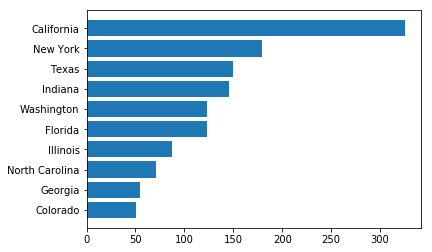

In [109]:
import matplotlib.pyplot as plt
dataMapSorted = dataMap.sort_values(by='count', ascending=True).tail(10)
plt.barh(dataMapSorted['state'], dataMapSorted['count'])


In [268]:
#locations que no son de usa
noUsaLocations = locations[(locations['anotherLocation'] != "undefinedPlace") & (locations['anotherLocation'] != "validUsaLocation") ]['anotherLocation'].count()
undefinedLocations = locations[(locations['anotherLocation'] == "undefinedPlace")]["anotherLocation"].count()
usaLocations = locations[(locations['anotherLocation'] == "validUsaLocation")]["anotherLocation"].count()

print("undefinedLocations: ", undefinedLocations)
print("noUsaLocations: ", noUsaLocations)
print("usaLocations: ", usaLocations)
#print(noUsaLocations +  undefinedLocations + usaLocations)

dataLocation = {
    "location" : ["Ubicacion no real\n o inexistente","Resto Del Mundo", "USA"],
    "count" : [undefinedLocations, noUsaLocations, usaLocations]
}
df = pd.DataFrame(dataLocation)

#plt.barh(df['location'], df['count'])

# plt.pie(df['count'], labels=df['location'], colors=['red','green','blue','skyblue'])
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()


undefinedLocations:  4386
noUsaLocations:  1218
usaLocations:  2009


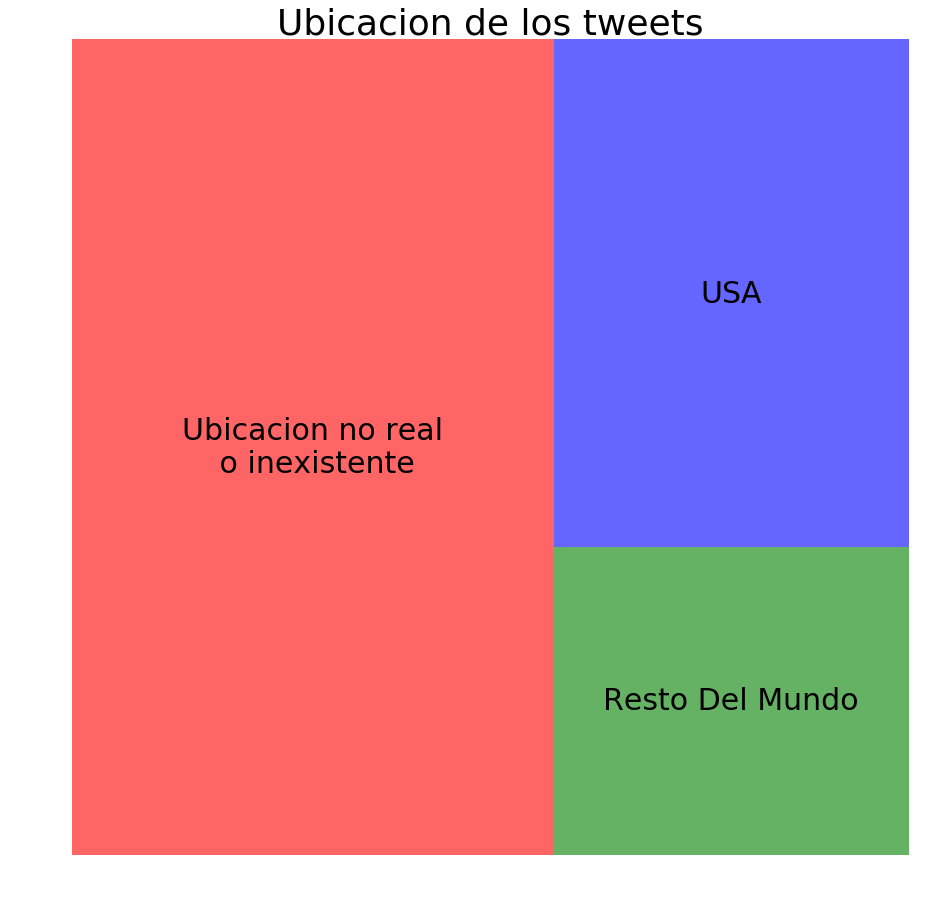

In [269]:
#libraries
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)
 
# Change color
squarify.plot( sizes=df['count'], label=df['location'], color=["red","green","blue", "grey"], alpha=0.6)
plt.axis('off')
plt.rcParams["figure.figsize"] = [0, 0]
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["font.size"] = 30
plt.title("Ubicacion de los tweets")
plt.show()


In [286]:
import numpy as np
import seaborn as sns
from matplotlib import cm

color = cm.YlGnBu(np.linspace(.4,.8, 10))
dataMapSorted.head()


,state,count
9,Colorado,51
8,Georgia,55
7,North Carolina,71
6,Illinois,87
5,Florida,123


Text(0,0.5,'')

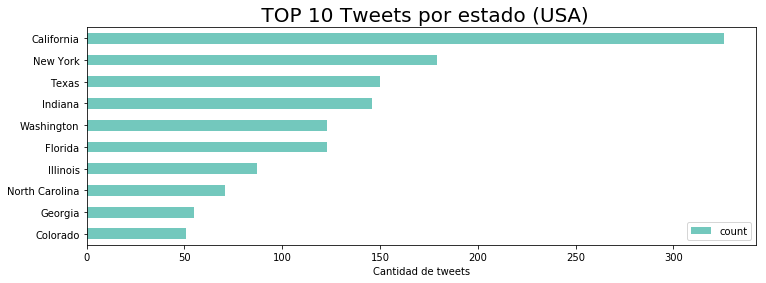

In [285]:
import numpy as np
import seaborn as sns
from matplotlib import cm

color = cm.YlGnBu(np.linspace(.4,.8, 10))

plot = dataMapSorted.plot(kind='barh',color=color, figsize=[12,4],fontsize = 10)
plot.set_yticklabels(dataMapSorted['state'])
plot.set_title(' TOP 10 Tweets por estado (USA)',fontsize = 20)
plot.set_xlabel('Cantidad de tweets',fontsize = 10)
plot.legend(fontsize = 10)
plot.set_ylabel('')

Text(0,0.5,'')

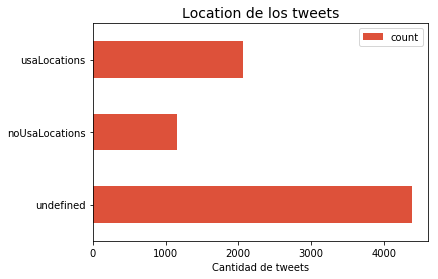

In [69]:
#locations que no son de usa
noUsaLocations = locations[(locations['anotherLocation'] != "undefinedPlace") & (locations['anotherLocation'] != "validUsaLocation") ]['anotherLocation'].count()
undefinedLocations = locations[(locations['anotherLocation'] == "undefinedPlace")]["anotherLocation"].count()
usaLocations = locations[(locations['anotherLocation'] == "validUsaLocation")]["anotherLocation"].count()

dataLocation = {
    "location" : ["NoEsPais","NoUSA", "USA"],
    "count" : [undefinedLocations, noUsaLocations, usaLocations]
}
df = pd.DataFrame(dataLocation)

plot = df.plot(kind='barh',color=color)
plot.set_yticklabels(df['location'])
plot.set_title('Location de los tweets',fontsize = 14)
plot.set_xlabel('Cantidad de tweets')
plot.set_ylabel('')

In [113]:
locations[(locations['anotherLocation'] == "undefinedPlace")].location.value_counts().head()


undefinedPlace    2533
London              45
Mumbai              22
Worldwide           19
Everywhere          15
Name: location, dtype: int64

In [114]:
locations[(locations['anotherLocation'] != "undefinedPlace") & (locations['anotherLocation'] != "validUsaLocation") ]['location'].value_counts()

USA                                      104
United States                             50
Canada                                    29
Nigeria                                   28
UK                                        27
India                                     24
Kenya                                     20
Australia                                 18
California, USA                           15
United Kingdom                            14
Indonesia                                 13
Ireland                                   12
NYC                                       12
London, UK                                10
US                                         9
South Africa                               8
Pennsylvania, USA                          7
Morioh, Japan                              6
 Road to the Billionaires Club             6
Singapore                                  6
California, United States                  6
Pakistan                                   5
The Nether

False